<a href="https://colab.research.google.com/github/Luis-Amagua/Visualizacion_datos_Python/blob/main/1_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
from matplotlib import pyplot as plt
import warnings

In [61]:
# se va a visualizar una serie de tiempo
years=list(range(2000,2015+1))
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [62]:

# para asociar un valor de una normal a la lista de los años anteriores
len(years)
valores= np.random.normal(size=len(years)) # media 0 varianza #(-2.5,2.4)
valores

array([ 0.74447321, -0.07923631, -0.77198576, -0.41973874,  0.45999199,
        0.56083497, -0.77969911,  1.76960523, -0.26519722, -1.15774397,
       -1.91567522,  0.04705299,  1.09385606,  0.26976863,  1.50716037,
        1.17979085])

In [63]:
# pueden existir valores negativi¿os, se pasa abs de numpy
valores=np.abs(valores)
valores

array([0.74447321, 0.07923631, 0.77198576, 0.41973874, 0.45999199,
       0.56083497, 0.77969911, 1.76960523, 0.26519722, 1.15774397,
       1.91567522, 0.04705299, 1.09385606, 0.26976863, 1.50716037,
       1.17979085])

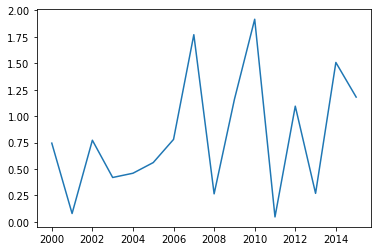

In [64]:
plt.plot(years,valores)
plt.show() #en ocaciones es necesario

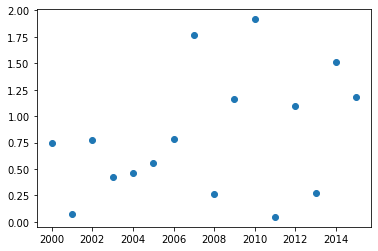

In [65]:
plt.scatter(years,valores)
plt.show()

<BarContainer object of 16 artists>

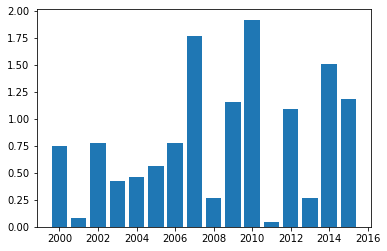

In [66]:
plt.bar(years, valores)

<BarContainer object of 16 artists>

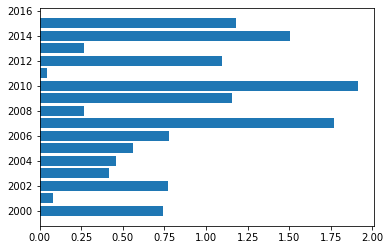

In [67]:
plt.barh(years,valores)

In [68]:
space=np.linspace(0,10000,10000, dtype=int) #inicio,fin,#particiones

In [69]:
distri=np.around(np.random.normal(size=10000),4)*1000  

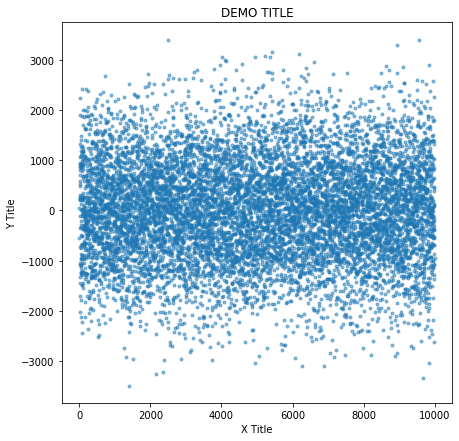

In [70]:
#graficas
plt.figure(figsize=[7,7]) # cambiar dimension de la imagen, de la hoja
plt.scatter(space,distri, alpha=0.5,marker='.')  #alpha es transparencia entre 0 y 1, marker es la forma grafico
plt.title('DEMO TITLE')
plt.xlabel('X Title')
plt.ylabel('Y Title')
plt.show()


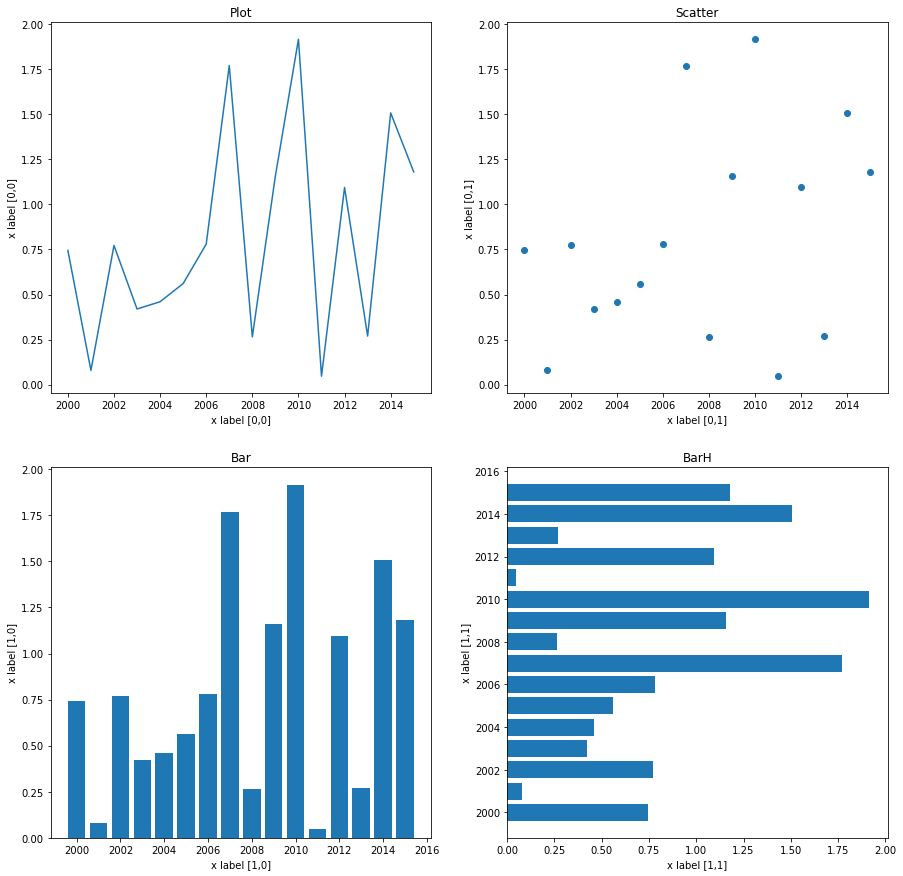

In [71]:
## Subplots

fig, ax=plt.subplots(2,2, figsize=(15,15)) # 4 graficos orientados en 2 filas y dos columnas
ax[0,0].plot(years,valores)
ax[0,0].set_title('Plot')
ax[0,1].scatter(years,valores)
ax[0,1].set_title('Scatter')
ax[1,0].bar(years,valores)
ax[1,0].set_title('Bar')
ax[1,1].barh(years,valores)
ax[1,1].set_title('BarH')

# imprimir el nombre de los ejes
for r in [0,1]:
  for c in [0,1]:
    ax[r,c].set_xlabel(f'x label [{r},{c}]')
    ax[r,c].set_ylabel(f'x label [{r},{c}]')
plt.show()


Ejemplo con pandas


In [84]:
import pandas as pd
import seaborn as sns       # con seaborn puedes poner colores formatps en las graficas
from matplotlib import pyplot as plt
import os

# settings
sns.set_theme()

In [90]:
# paradar permisos y ubicar la carpeta
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
os.chdir('drive/MyDrive/CIENCIA DE DATOS/Datapath/Visualizacion de datos')

FileNotFoundError: ignored

In [109]:
# os.getcwd() # verifica que la direccion está correctamente para usar los datos
df=pd.read_csv('./data/m2/hogar-data.csv', sep=";")
df.head()

,hashidhogar,area,numhab,gasviv,latitud,longitud
0,7c26d5d122b6129c4580c0d21cb708f2b373a05e0db56a...,2,7,47000,-6.279874,-79.547844
1,93f524ce17d35ba95cc5997a016f507c2ae7bf5521c4a2...,2,7,56000,-7.673199,-78.194168
2,330651fb35a7aaa952785f1f8dc9f506a1ff9ef6ae0ce1...,2,4,54000,-5.314705,-78.735115
3,dd9b4285b385d9e1f65a8b749527f56da1e8455379b47d...,1,10,82000,-5.739996,-77.906250
4,0b4b1ee22f1c588f52a94fd2a5d7d5f363459cede9fda4...,1,6,143000,-6.228831,-77.869240


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hashidhogar  1000 non-null   object 
 1   area         1000 non-null   int64  
 2   numhab       1000 non-null   int64  
 3   gasviv       1000 non-null   int64  
 4   latitud      1000 non-null   float64
 5   longitud     1000 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [114]:
# transformacion de la columna de area con etiqueta
df['area'].unique()
# se tienen solo dos opciones en el area

array(['rural', 'urbano'], dtype=object)

In [113]:
df['area']=df['area'].map({1: 'urbano',2: 'rural'})

In [117]:
df['area'].unique() # se cambio correctamente las etiquetas en todo el dataframe

array(['rural', 'urbano'], dtype=object)

## Gráficos con pandas

In [119]:
df.groupby(by='area')['hashidhogar'].count()    # primero se agrupa y despues se aumenta que quieres hacer? 

area
rural     388
urbano    612
Name: hashidhogar, dtype: int64

In [121]:
df.groupby(by='area')['hashidhogar'].count().to_frame()

,hashidhogar
area,
rural,388
urbano,612


In [125]:
df.groupby(by='numhab')['hashidhogar'].count()

numhab
4     110
5     175
6     266
7     221
8     124
9      59
10     23
11     11
12      6
13      3
14      1
17      1
Name: hashidhogar, dtype: int64

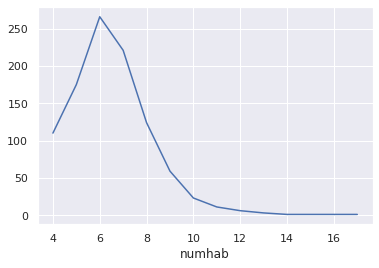

In [130]:
df.groupby(by='numhab')['hashidhogar'].count().plot(kind='line')

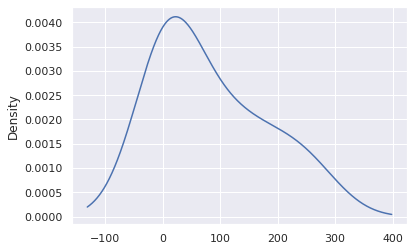

In [132]:
df.groupby(by='numhab')['hashidhogar'].count().plot(kind='kde') # grafico de densidad

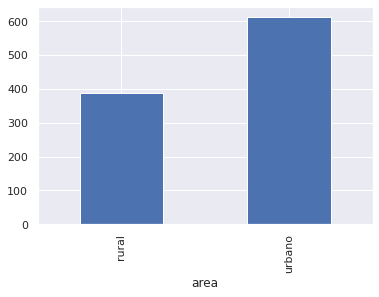

In [128]:
df.groupby(by='area')['hashidhogar'].count().plot(kind='bar')

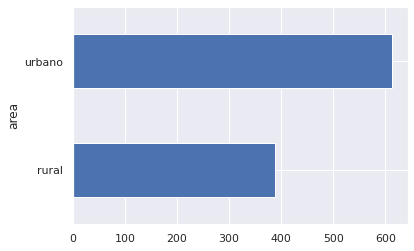

In [129]:
df.groupby(by='area')['hashidhogar'].count().plot(kind='barh')